<a href="https://colab.research.google.com/github/ykitaguchi77/ImageProcessing/blob/master/Eye_crop1.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#顔の画像から目を検出して切り抜くスクリプト
・Haarcascade_eyeを使用<br>
・目が検出できないものはskipする<br>
・検出された目周囲の画像を縦横とも1.1倍の幅で切り抜く
・切り取った画像を250px*250pxにresizeする<br>
・対応表をCSV形式で出力（連番、左右、元フォルダ、元画像名）

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy
import pandas as pd
import csv
from random import randint
from time import sleep

import glob
import random
from PIL import Image
%matplotlib inline

#サポートパッチのインポート
from google.colab.patches import cv2_imshow
import cv2

plt.ion()   # interactive mode

#Google colabをマウント

In [2]:
'''
・dlibを用いて目を切り抜く
・横幅を2倍、縦幅を上に2倍にして画像を切り取る（目の全幅、眉毛が含まれるように）
'''

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#元画像フォルダ
in_path = '/content/drive/My Drive/Deep_learning/eyelid_images/in'

#保存先フォルダ
out_path = '/content/drive/My Drive/Deep_learning/eyelid_images/out2'

#CSVファイルのフォルダ
csv_path = '/content/drive/My Drive/Deep_learning/eyelid_images/eyelid_images2.csv'


#Haarcascadeを指定

In [4]:
# カスケードファイルのパス
eye_cascade_path = '/content/drive/My Drive/Deep_learning/haarcascade_eye.xml'

# カスケード分類器の特徴量取得
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

#画像を切り抜いて連番で出力、対応表出力
12時間で60000枚を処理するのは不可能（1秒間に3枚として12000枚 =フォルダ1600個ぐらいが限界）<br>
→1回のセッションでフォルダ1000個ずつを処理することとする

In [ ]:
#処理するDirectoryの設定
directory = os.listdir(in_path)
print(len(directory))

#ここにフォルダ番号を記載する (ex. [0:999])
processing_directory = directory[0:999]
#print(processing_directory)

In [ ]:
#処理時間の計測
start = time.time()

with open(csv_path, 'a', newline='') as f:  #a:追記モード
        writer = csv.writer(f)
        fieldnames = ['Number', 'Folder', 'FileName']       
        writer.writerow(['Folder', 'Image_num', 'side (R:0, L:1)', 'ImageName', 'Number'])  #header
        
        k=0
        for i in processing_directory:  #フォルダ数の分だけ
              file = os.listdir(in_path + '/' + i)

              l=0
              for j in file:
                    l+=1
                    print(str(l))
                    print('')
                    img = cv2.imread(in_path + '/' + i + '/' + j) 
                    img2 = img.copy()

                    # 画像グレースケール化
                    grayscale_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

                    #300pix以上のもので目に見えるものを抽出
                    eye_list = eye_cascade.detectMultiScale(grayscale_img, minSize=(300, 300))
                    print('image path = '+ in_path + '/' + i + '/' + j )
                    
                    # 眼検出判定
                    if len(eye_list) >= 1:
                        print('目が' + str(len(eye_list)) +'個検出されました')
                        pass
                    else:
                        print("no eye detected")
                        break

                    #画像の切り抜きと保存（連番にする）
                    
                    m=0
                    for (ex, ey, ew, eh) in eye_list:
                        m+=1
                        #print("[ex,ey] = %d,%d [ew,eh] = %d,%d" %(ex, ey, ew, eh))
                        try:
                          cv2.rectangle(img2, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
                          img_cropped = img[int(ey-h): int(ey + eh), int(ex-ew/2): int(ex + ew*3/2)]
                          img_resized = cv2.resize(img_cropped,(1000,1000)) #1辺250pixにresize 
                          #x, y = random.randint(0,27), random.randint(0,27) #ランダムな位置で224pixに切り取る
                          #img_randcrop = img_resized[y: y+223, x: x+223]
                        except:
                          print('crop error')

                        if ex <= 600:
                            side = 0 #600ピクセル目より左にあるのは右眼
                        else:
                            side = 1 #600ピクセル目より右にあるのは左眼
                        
                        '''
                        print(out_path + '/' +str(i)+'-' + str(l) + '-' + str(side)+ '.jpg')
                        '''

                        #保存する際のよくわからないエラーをskipする
                        try:
                            cv2.imwrite(out_path + '/'+str(i)+'-' + str(l) + '-' + str(side)+ '.jpg', img_resized)
                            #対応表の作成
                            writer.writerow([str(i), str(l),side, str(j), str(k+1)])
                            k+=1
                        except:
                            print('csv writing error')

print('Process done!!')
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")


ストリーミング出力は最後の 5000 行に切り捨てられました。
3

image path = /content/drive/My Drive/Deep_learning/eyelid_images/in/7840/20110803000000_眼位_O_0_8dab6eb63a07982e9d05065baecc686391dad1690755ca50cb2c7fa68b99cea8.jpg
4

image path = /content/drive/My Drive/Deep_learning/eyelid_images/in/7840/20110803000000_眼位_O_0_f1d4f83e5da4e7eebfa354860f212cab2c8d8a64b8f20aa712913e41a9eec30a.jpg
5

image path = /content/drive/My Drive/Deep_learning/eyelid_images/in/7840/20110803000000_眼位_O_0_6aff067707e5d6df9f4c862228764d60540cf67d4c0adb01fac800ab203dcf31.jpg
6

image path = /content/drive/My Drive/Deep_learning/eyelid_images/in/7840/20110803000000_眼位_O_0_e6ec7d8a24bedf8fd56593297f7c3aae28e5314d4f737e1fcdce4f2a7dbbd9ca.jpg
7

image path = /content/drive/My Drive/Deep_learning/eyelid_images/in/7840/20110803000000_眼位_O_0_3f817b16a6cafc50af4928f1168f742a9c108c7a489711c381f02afdad2014b1.jpg
1

image path = /content/drive/My Drive/Deep_learning/eyelid_images/in/7842/20130523153019_眼位_O_0_b2b7a7201817d8824a98dec6b7d2e7a253b

#切り取られた図を表示してみる

['7205-1-1.jpg', '7213-7-0.jpg', '7213-5-0.jpg', '7213-7-1.jpg', '7213-6-0.jpg', '7213-5-1.jpg', '7213-4-1.jpg', '7213-4-0.jpg', '7213-2-1.jpg', '7213-3-1.jpg', '7213-3-0.jpg', '7213-1-0.jpg', '7213-1-1.jpg', '7213-2-0.jpg', '7211-1-0.jpg', '7213-8-1.jpg', '7213-8-0.jpg', '7211-1-1.jpg', '7205-1-0.jpg']


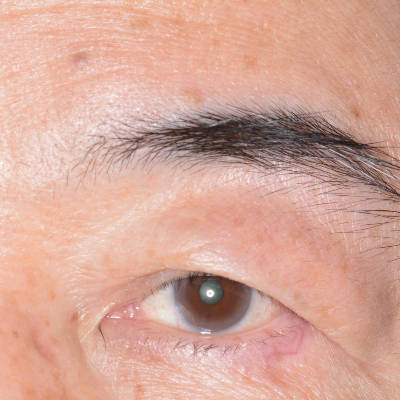

In [ ]:
img_list = os.listdir(out_path)
print(img_list)
img = cv2.imread(out_path + '/'+img_list[0])


#アスペクト比を維持したまま横を400pixelに縮小する
def scale_to_width(img, width):
    scale = width / img.shape[1]
    return cv2.resize(img, dsize=None, fx=scale, fy=scale)
dst = scale_to_width(img, 400)

#図を表示する
cv2_imshow(dst)